In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [4]:
data = pd.read_csv("Mall_Customers.csv")
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.info()
data.describe()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [8]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


In [9]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
data['Segment'] = clusters

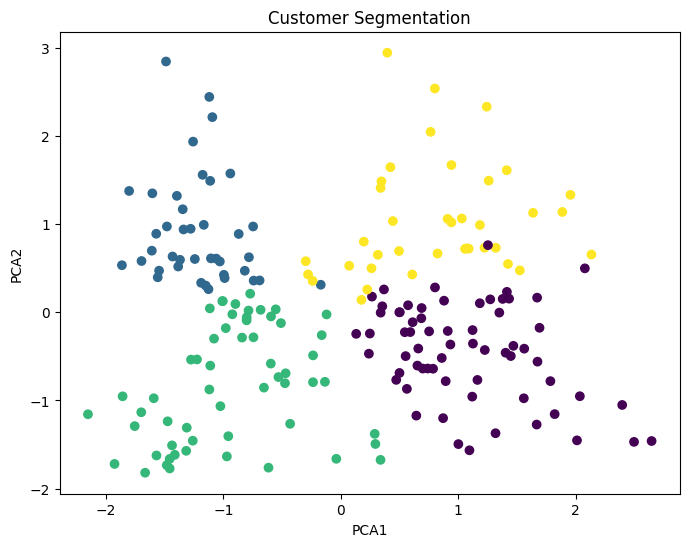

In [10]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(8,6))
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=clusters, cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Customer Segmentation')
plt.show()


In [12]:
np.random.seed(42)
data['Sales'] = data['Annual Income (k$)'] * 0.3 + data['Spending Score (1-100)'] * 0.5 + np.random.normal(0,10,len(data))


In [14]:
X = data[['Age','Annual Income (k$)','Spending Score (1-100)','Segment']]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 127.15352430904811


In [15]:
print(data.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Segment', 'Sales'],
      dtype='object')


In [16]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.head(10)


,Actual,Predicted
95,29.364851,41.888400
15,39.877125,40.633691
30,4.982934,11.280388
158,11.986965,36.213874
128,27.796514,20.623654
115,47.515473,48.586873
69,31.448802,40.625679
170,23.704856,34.149118
174,35.666908,33.426079
45,37.001558,43.016151


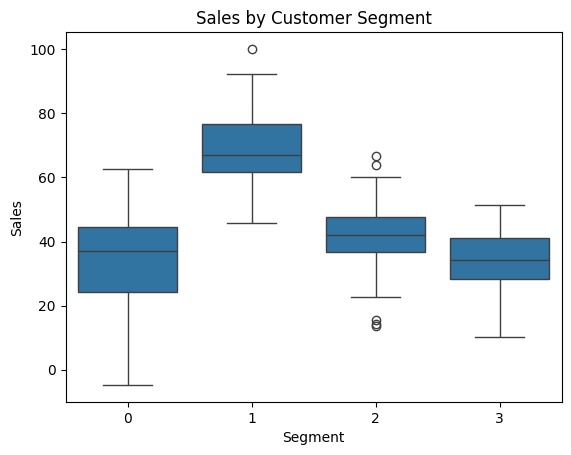

In [17]:
sns.boxplot(x='Segment', y='Sales', data=data)
plt.title('Sales by Customer Segment')
plt.show()

